In [1]:
import numpy as np
import pandas as pd
import vitaldb as vf
import matplotlib.pyplot as plt
from os import listdir

savepath = 'data/dataset03/'
data_dir = 'data/vitaldb_balanced/'

In [2]:
sample_rate = {
'SNUADC': 1/500,
'Solar8000': 2,
'Primus/CO2': 1/62.5,
'Primus/E': 7,
'Primus/F': 7,
'Primus/I': 7,
'Primus/M': 7,
'Primus/T': 7,
'Orchestra': 1,
'BIS': 1,
}

In [4]:

filenames = listdir(data_dir)
caseIDs = [int(filename.replace('.vital', '')) for filename in filenames]

track_names = vf.vital_trks(data_dir + filenames[0])

dataquality = pd.DataFrame(columns=track_names, index=caseIDs)
j = 0

for i, path in zip(caseIDs, filenames):
    path = data_dir + path

    for device in sample_rate:
        indices = [i for i, track in enumerate(track_names) if device in track]
        track_slice = track_names[indices[0]:indices[-1]+1]
        case = vf.VitalFile(path).to_pandas(track_slice, sample_rate[device])

        for track in track_slice:
            n = case[track].shape[0]
            k = case[track].isna().sum()
            dataquality.loc[i, track] = k/n
    
    print("Fortschritt: %.1f" % (100 * j / len(caseIDs)),' % ', end='\r')
    j += 1

dataquality.to_csv('data/dataset03/dataquality.csv')

/var/folders/j7/bw9_d4_d3vl_bdbfc7_pz7p40000gp/T/ipykernel_80824/2412948617.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


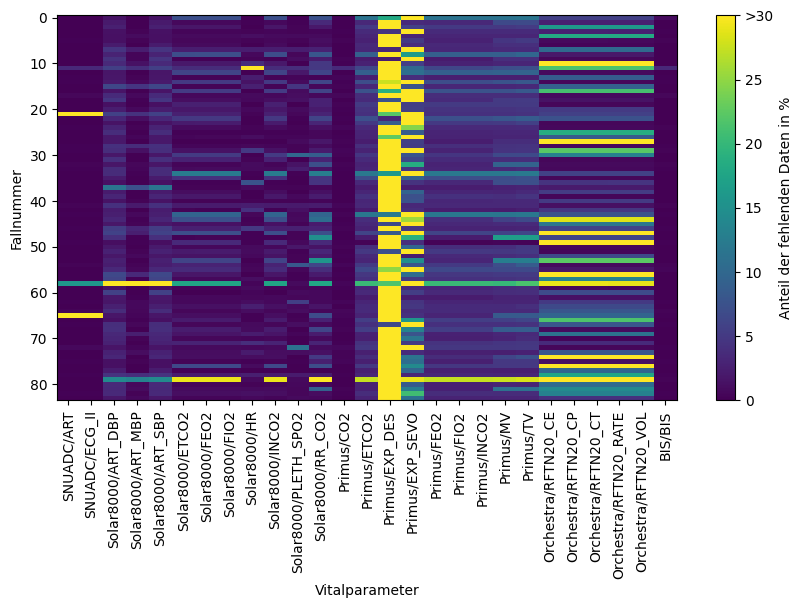

In [5]:
labeldrop = ['Solar8000/NIBP_DBP', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP']
dataquality = pd.read_csv(savepath + 'dataquality.csv', index_col=0)
dataquality.drop(columns=labeldrop, inplace=True)

dataquality = dataquality.dropna(thresh=len(dataquality.columns))

qualityarray = dataquality.to_numpy()

columns = dataquality.columns.to_list()
case = range(len(dataquality.index))
image = 100*dataquality.to_numpy()

fig, ax = plt.subplots(figsize=(10, 5))
mesh = ax.pcolormesh(columns, case, image, vmin=0, vmax=30, cmap='viridis')

### Add a colorbar with custom ticks and labels
cbar = fig.colorbar(mesh, ax=ax, label='Anteil der fehlenden Daten in %')
ticks = cbar.get_ticks()

# Modify the largest tick to include a ">" symbol
ticks[-1] = ticks[-1]  # Keep the value as it is for spacing
tick_labels = [str(int(tick)) for tick in ticks]
tick_labels[-1] = f'>{tick_labels[-1]}'

# Set the new ticks and labels on the colorbar
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

### Set the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Vitalparameter')
ax.set_yticks(range(0,len(dataquality.index),10))
ax.set_ylabel('Fallnummer')
ax.invert_yaxis()

plt.show()

/var/folders/j7/bw9_d4_d3vl_bdbfc7_pz7p40000gp/T/ipykernel_45039/3676708860.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


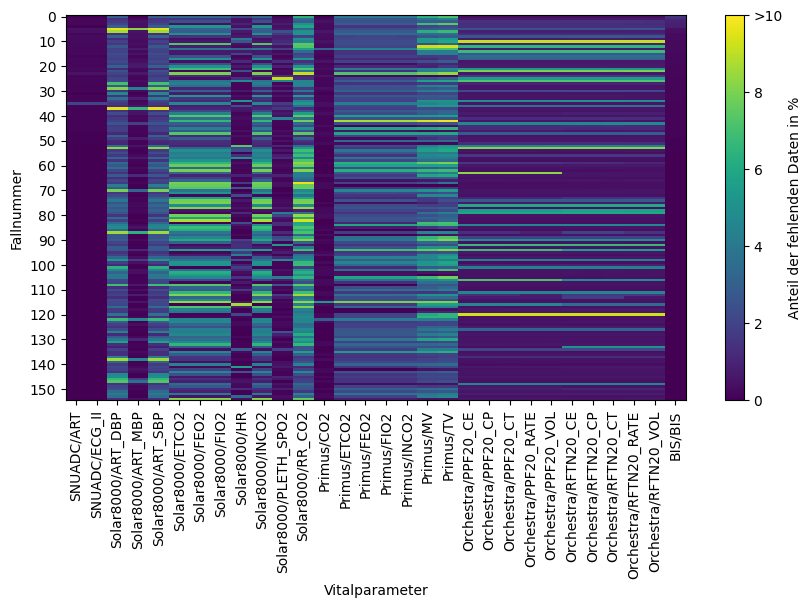

In [4]:
### Remove rows with more than 10% missing data
labeldrop = ['Solar8000/NIBP_DBP', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP']
dataquality = pd.read_csv(savepath + 'dataquality.csv', index_col=0)
dataquality.drop(columns=labeldrop, inplace=True)

dataquality = dataquality.dropna(thresh=len(dataquality.columns))
dataquality = dataquality[(dataquality < 0.1).all(axis=1)]


qualityarray = dataquality.to_numpy()

#dataquality.to_csv('data/dataset.csv')

columns = dataquality.columns.to_list()
case = range(len(dataquality.index))
image = 100*dataquality.to_numpy()


fig, ax = plt.subplots(figsize=(10, 5))
mesh = ax.pcolormesh(columns, case, image, vmin=0, vmax=10, cmap='viridis')

### Add a colorbar with custom ticks and labels
cbar = fig.colorbar(mesh, ax=ax, label='Anteil der fehlenden Daten in %')
ticks = cbar.get_ticks()

# Modify the largest tick to include a ">" symbol
ticks[-1] = ticks[-1]  # Keep the value as it is for spacing
tick_labels = [str(int(tick)) for tick in ticks]
tick_labels[-1] = f'>{tick_labels[-1]}'

# Set the new ticks and labels on the colorbar
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

### Set the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Vitalparameter')
ax.set_yticks(range(0,len(dataquality.index),10))
ax.set_ylabel('Fallnummer')
ax.invert_yaxis()

plt.show()

In [5]:
#### Data stats
case_columns = ['age','sex','height','weight','bmi', 'opstart', 'opend']
data = pd.read_csv('data/info_vitaldb/cases.csv', index_col=0)
data = data.loc[list(dataquality.index)]
data.to_csv(savepath + 'dataset.csv')
data = data[case_columns].to_numpy()
data[:, 1] = np.where(data[:, 1] == 'F', 0.0, 1.0)
data = pd.DataFrame(data, columns=case_columns, dtype=float)
data['optime'] = (data['opend'] - data['opstart']) / 60
print(data['sex'].value_counts())
data.describe()

sex
1.0    104
0.0     51
Name: count, dtype: int64


,age,sex,height,weight,bmi,opstart,opend,optime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,58.458065,0.670968,164.127097,61.947355,22.923871,3010.522581,15512.141935,208.360323
std,15.134136,0.471385,8.062896,11.172532,3.318447,1057.383879,6705.899828,106.579589
min,20.000000,0.000000,146.900000,40.800000,14.400000,1111.000000,5324.000000,50.000000
25%,50.500000,0.000000,158.000000,53.650000,20.200000,2240.500000,10162.000000,118.266667
50%,61.000000,1.000000,164.900000,61.400000,22.800000,2838.000000,13834.000000,180.000000
75%,69.000000,1.000000,169.550000,68.850000,25.150000,3593.000000,20214.000000,275.000000
max,85.000000,1.000000,188.600000,92.100000,37.600000,7668.000000,36665.000000,540.000000
